# Medical Intent Classification - Automating Image Parsing for Healthcare/Clinical Related Queries
---

### Approach
---

#### Data Collection

   
- Gather real or synthetic patient queries from a medical inquery PNG images.

- Extract the text from the pdf using Tesseract OCR - Optical Character Recognition (OCR) engine.

- parse the text using Pandas & Spacy and create a dataframe with Label intents such as: appointment_request, prescription_refill, symptom_inquiry, insurance_coverage.



## Step 1: : Extract the text from the pdf using Tesseract OCR - Optical Character Recognition (OCR) engine.
---

In [1]:
#import libaries
import pytesseract
from PIL import Image

In [2]:
import os

# Set new working directory
os.chdir("/Users/johnryan/Downloads/Documents/Data Sets")


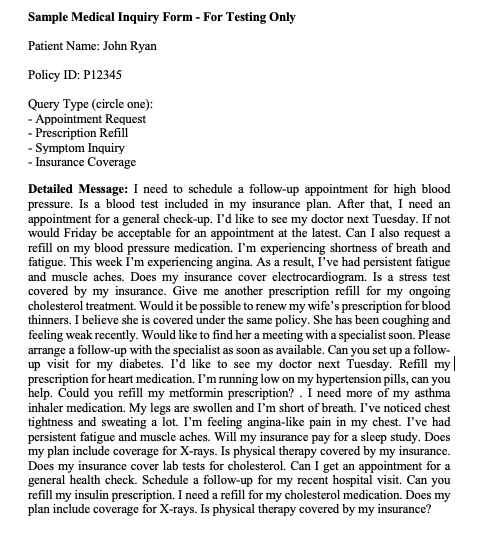

In [3]:
import_form = Image.open("sample_medical_intent_form.png")
import_form

In [6]:
#convert the image to a string
text = pytesseract.image_to_string(import_form)
text

"‘Sample Medical Inquiry Form - For Testing Only\nPatient Name: John Ryan\nPolicy ID: P12345\n\n(Query Type (circle one:\n~ Appointment Request\n= Prescription Refill\n\n- Symptom Inquiry\n\n= Insurance Coverage\n\nDetailed Message: I need to schedule a follow-up appointment for high blood\npressure. Isa blood test included in my insurance plan. Aer that, T need an\nappointment for a general check-up. I'd like to see my doctor next Tuesday. If not\n‘would Friday be acceplable for an appointment atthe latest. Can I also request a\nrefill on my blood pressure medication. I'm experiencing shortness of breath and\nfatigue. This week I'm experiencing angina. Asa reslt, I've had persistent fatigue\nand muscle aches. Does my insurance cover electocardiogram. Is a stress test\ncovered by my insurance. Give me another prescription refill for my ongoing\ncholesterol treatment. Wouldit be possible to renew my wife's prescription fr blood\nthinners. believe she is covered under the same policy. Sh

## Step 2: Parse the text using Pandas and Spacy to create a Dataframe
---

In [7]:
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")

doc = nlp(text)
sentences = [sent.text.strip() for sent in doc.sents]
query_df = pd.DataFrame({'query_line': sentences})
query_df = query_df.iloc[2:].reset_index(drop=True)
query_df.head()

,query_line
0,Isa blood test included in my insurance plan.
1,"Aer that, T need an\nappointment for a general..."
2,I'd like to see my doctor next Tuesday.
3,If not\n‘would Friday be acceplable for an app...
4,Can I also request a\nrefill on my blood press...


## Use Spacy to intellegently extract each unqiue sentence and assign medical intent categories to each row

In [9]:
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")

doc = nlp(text)
sentences = [sent.text.strip() for sent in doc.sents]
query_df = pd.DataFrame({'query_line': sentences})
query_df = query_df.iloc[2:].reset_index(drop=True)

query_df['label'] = ['Insurance Coverage', 'Appointment Request', 'Appointment Request', 'Appointment Request', 'Prescription Refill', 'Symptom Inquiry', 'Symptom Inquiry', 
                     'Symptom Inquiry', 'Insurance Coverage', 'Insurance Coverage', 'Prescription Refill', 'Prescription Refill', 
                     'Insurance Coverage', 'Symptom Inquiry', 'Appointment Request', 'Appointment Request', 'Appointment Request', 'Appointment Request', 
                     'Prescription Refill', 'Prescription Refill', 'Prescription Refill', 'Symptom Inquiry', 'Symptom Inquiry', 'Insurance Coverage', 'Insurance Coverage', 
                     'Insurance Coverage', 'Insurance Coverage', 'Appointment Request', 'Prescription Refill', 'Prescription Refill', 'Insurance Coverage', 'Insurance Coverage' ][:len(sentences)]


# Show result
print(query_df)


                                           query_line                label
0       Isa blood test included in my insurance plan.   Insurance Coverage
1   Aer that, T need an\nappointment for a general...  Appointment Request
2             I'd like to see my doctor next Tuesday.  Appointment Request
3   If not\n‘would Friday be acceplable for an app...  Appointment Request
4   Can I also request a\nrefill on my blood press...  Prescription Refill
5   I'm experiencing shortness of breath and\nfati...      Symptom Inquiry
6                  This week I'm experiencing angina.      Symptom Inquiry
7   Asa reslt, I've had persistent fatigue\nand mu...      Symptom Inquiry
8           Does my insurance cover electocardiogram.   Insurance Coverage
9          Is a stress test\ncovered by my insurance.   Insurance Coverage
10  Give me another prescription refill for my ong...  Prescription Refill
11  Wouldit be possible to renew my wife's prescri...  Prescription Refill
12      believe she is co

In [10]:
print(f"query_df length: {len(query_df)}")

query_df length: 32


In [11]:
#add new data 
new_data = {'query_line': [
        # Appointment Request (10)
        "Can I book a doctor’s appointment for next week?", "Schedule a check-up for my annual physical.",
        "I need an appointment with a cardiologist soon.", "Please arrange a visit for my routine check-up.",
        "Can you set up a follow-up visit for my diabetes?", "I’d like to see my doctor next Tuesday.",
        "Book an appointment for my hypertension check.", "I need a consultation with a specialist this month.",
        "Can I get an appointment for a general health check?", "Schedule a follow-up for my recent hospital visit.",
        "Can you help me schedule a doctor visit next Friday?", "I'd like to arrange a physical exam this month.", "Book a check-up for my child as soon as possible.", 
        "I need to see a dermatologist about a skin issue.", "Please schedule a follow-up with my GP for next week.", "Can I set up a consultation for my back pain?", "I want to book a visit with my family doctor soon.",
        "Help me get an appointment for a flu shot.", "Schedule a visit for my allergy symptoms, please.", "I’m due for a check-up — can we set it for this Thursday?",
        # Prescription Refill (10)
        "Can you refill my insulin prescription?", "I need a refill for my cholesterol medication.",
        "Please renew my blood pressure meds.", "Can I get more of my diabetes medication?",
        "Refill my prescription for heart medication.", "I’m running low on my hypertension pills, can you help?",
        "Could you refill my metformin prescription?", "I need more of my asthma inhaler medication.",
        "Please arrange a refill for my thyroid medication.", "Can you renew my prescription for blood thinners?",
        "Can you process a refill for my antidepressant?", "I’m almost out of my migraine meds — can I get a refill?", "Please renew my prescription for allergy tablets.",
        "I need another month of my arthritis medication.", "Could you refill my birth control prescription?", "I’d like to request a refill for my anxiety medication.", 
        "My painkillers are nearly finished — can you top them up?", "Can I get another inhaler for my COPD?", "Please send a refill request to my pharmacy for my statins.", 
        "I need to renew my medication for acid reflux.",
        # Symptom Inquiry (10)
        "I’m feeling chest pain and shortness of breath.", "Lately, I’ve had dizziness and fatigue.",
        "I’m experiencing palpitations and nausea.", "This week, I’ve had severe headaches and tiredness.",
        "I’ve been coughing and feeling weak recently.", "I’m having trouble breathing and feel lightheaded.",
        "My legs are swollen and I’m short of breath.", "I’ve noticed chest tightness and sweating a lot.",
        "I’m feeling angina-like pain in my chest.", "I’ve had persistent fatigue and muscle aches.",
        "I’ve had a constant sore throat and mild fever.", "My stomach’s been hurting and I feel nauseous.",
        "I’ve been getting chills and night sweats recently.", "There’s a sharp pain in my lower back and abdomen.",
        "I’ve had blurred vision and occasional dizziness.", "My joints are aching and I feel unusually tired.",
        "I’m experiencing tingling in my fingers and toes.", "I’ve had a rash that’s spreading and very itchy.",
        "My heart’s been racing and I feel anxious all the time.", "I’ve had trouble sleeping and waking up with headaches.",
        # Insurance Coverage (10)
        "Does my insurance cover a CT scan?", "Is a blood test included in my insurance plan?",
        "Can I get an MRI with my current insurance?", "Does my policy cover echocardiograms?",
        "Is a stress test covered by my insurance?", "Will my insurance pay for a sleep study?",
        "Does my plan include coverage for X-rays?", "Is physical therapy covered by my insurance?",
        "Can I get a mammogram with my insurance?", "Does my insurance cover lab tests for cholesterol?", "Will my insurance cover a visit to a specialist?", "Does my plan include mental health services?",
        "Is telehealth covered under my current insurance?", "Can I get vaccinated through my insurance?", "Does my insurance pay for annual physical exams?", "Is dental cleaning included in my policy?",
        "Will I be covered if I see an out-of-network doctor?", "Does my insurance cover prescription medication refills?", "Can I use my insurance for a second opinion consultation?", "Is occupational therapy part of my coverage?",
     
    ], 'label': [ "Appointment Request"]*20 + ["Prescription Refill"]*20 + ["Symptom Inquiry"]*20 + 
        ["Insurance Coverage"]*20
}
query_df = pd.concat([query_df, pd.DataFrame(new_data)], ignore_index=True)
print(f"Total df length: {len(query_df)}")

Total df length: 112


Step 3: Clean, tokenize, and vectorize the text using: AutoTokenizer
---

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
query_df['label_id'] = le.fit_transform(query_df['label'])  # maps label names to 0, 1, 2, 3

# Split into train and test sets (e.g., 80% train, 20% test)
train_df, test_df = train_test_split(query_df, test_size=0.2, random_state=42)

In [18]:
from transformers import AutoTokenizer
import tensorflow as tf

model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize function
def tokenize_data(query_df):
    return tokenizer(
        query_df['query_line'].tolist(),
        truncation=True,
        padding=True,
        max_length=128,
        return_tensors='tf'  #TensorFlow on CPU, not GPU.
    )

train_encodings = tokenize_data(train_df)
test_encodings = tokenize_data(test_df)

train_labels = train_df['label_id'].tolist()
test_labels = test_df['label_id'].tolist()

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import TFAutoModelForSequenceClassification
from transformers.optimization_tf import AdamWeightDecay
import tensorflow as tf

# Preprocess
le = LabelEncoder()
query_df['label_id'] = le.fit_transform(query_df['label'])
train_df, test_df = train_test_split(query_df, test_size=0.2, random_state=42)

print("Training set labels:", train_df['label'].value_counts().to_dict())
print("Test set labels:", test_df['label'].value_counts().to_dict())


Training set labels: {'Insurance Coverage': 24, 'Symptom Inquiry': 23, 'Appointment Request': 23, 'Prescription Refill': 19}
Test set labels: {'Prescription Refill': 9, 'Insurance Coverage': 6, 'Appointment Request': 5, 'Symptom Inquiry': 3}
